In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import cluster
pd.reset_option('all')
surveyData = pd.read_csv('classSurvey2024b2.csv')

C:\Users\dillo\AppData\Local\Temp\ipykernel_24328\3944179264.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [2]:
print('Here is the basic information: \n', surveyData.shape)
surveyData.info()
surveyData.describe()

Here is the basic information: 
 (107, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     107 non-null    object
 1   eMail    107 non-null    object
 2   Major    106 non-null    object
 3   Excel    107 non-null    int64 
 4   Oral     107 non-null    int64 
 5   Written  107 non-null    int64 
 6   Stats    107 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 6.0+ KB


,Excel,Oral,Written,Stats
count,107.000000,107.000000,107.000000,107.000000
mean,3.364486,3.943925,4.065421,2.794393
std,0.828644,0.877731,0.780312,0.723439
min,1.000000,1.000000,2.000000,1.000000
25%,3.000000,3.000000,4.000000,2.000000
50%,3.000000,4.000000,4.000000,3.000000
75%,4.000000,5.000000,5.000000,3.000000
max,5.000000,5.000000,5.000000,4.000000


In [3]:
surveyData.head()

,Name,eMail,Major,Excel,Oral,Written,Stats
0,Brittany Curtis,Britcurtis@me.com,Management,1,4,4,1
1,Hailey Burke,hailey.burke@smail.astate.edu,Accounting,4,4,4,2
2,Lucie Lair,lucie.lair@smail.astate.edu,Marketing,3,5,4,3
3,Luke Dibble,luke.dibble@smail.astate.edu,Management,4,4,5,3
4,Cecilia Tacker,cecilia.tacker@smail.astate.edu,Accounting,4,4,5,3


In [4]:
surveyData.tail()

,Name,eMail,Major,Excel,Oral,Written,Stats
102,Brooklyn Ramsey,brooklyn.ramsey@smail.astate.edu,Finance,2,2,2,2
103,Abigail Sanchez,abigail.sanchez@smail.astate.edu,Finance,3,4,3,4
104,Jay Gregory,jaylen.gregory@smail.astate.edu,Finance,2,4,4,4
105,Robert Carter,robertbrickcarter@gmail.com,Management,3,5,5,2
106,Stacy Chappell,stacy.chappell@smail.astate.edu,Management,3,3,4,3


In [5]:
surveyData['Excel'].value_counts()

Excel
4    45
3    44
2    10
5     5
1     3
Name: count, dtype: int64

In [6]:
print('Average for Excel skills is '+str(surveyData['Excel'].mean()))
print('Median for Excel skills is '+str(surveyData['Excel'].median()))

Average for Excel skills is 3.364485981308411
Median for Excel skills is 3.0


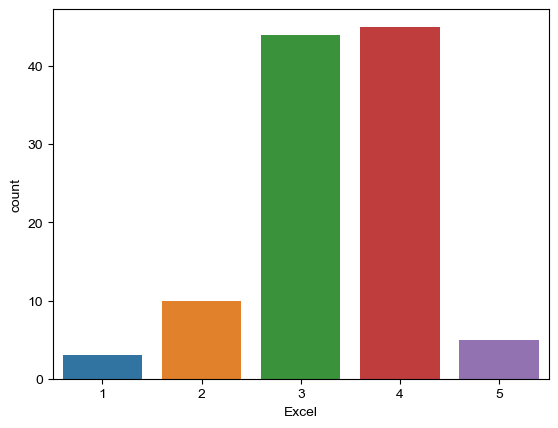

In [7]:
ax = sns.countplot(x='Excel', data=surveyData)
sns.set(palette='colorblind', style='ticks',font_scale=1.2)

C:\Users\dillo\AppData\Local\Temp\ipykernel_24328\482070552.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(surveyData['Excel'])
C:\Users\dillo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


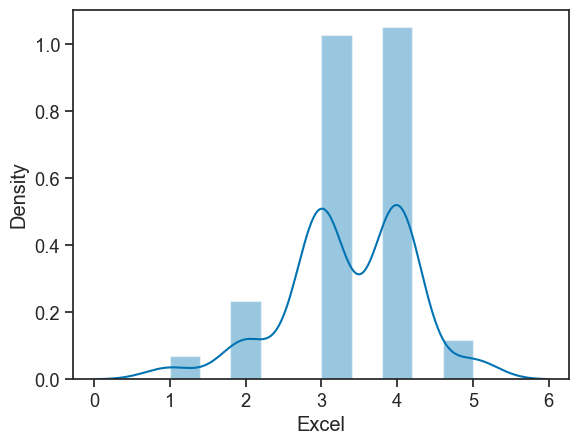

In [8]:
ax = sns.distplot(surveyData['Excel'])

C:\Users\dillo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


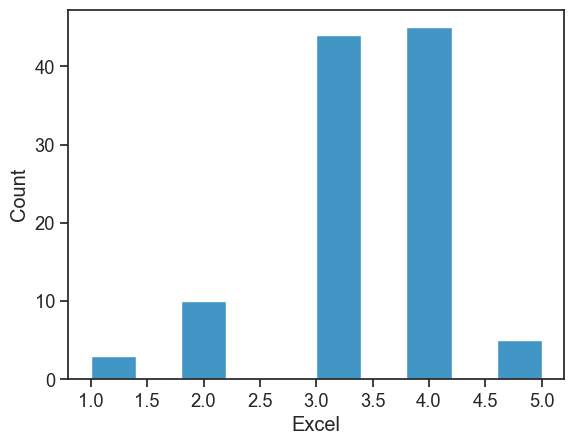

In [9]:
ax = sns.histplot(surveyData['Excel'])

In [10]:
surveyData['verbalSkills'] = (surveyData['Oral'] + surveyData['Written']) * 10
surveyData['quantSkills'] = (surveyData['Excel'] + surveyData['Stats']) * 10
surveyData.head()

,Name,eMail,Major,Excel,Oral,Written,Stats,verbalSkills,quantSkills
0,Brittany Curtis,Britcurtis@me.com,Management,1,4,4,1,80,20
1,Hailey Burke,hailey.burke@smail.astate.edu,Accounting,4,4,4,2,80,60
2,Lucie Lair,lucie.lair@smail.astate.edu,Marketing,3,5,4,3,90,60
3,Luke Dibble,luke.dibble@smail.astate.edu,Management,4,4,5,3,90,70
4,Cecilia Tacker,cecilia.tacker@smail.astate.edu,Accounting,4,4,5,3,90,70


In [11]:
lstData0 = surveyData['quantSkills']
lstData1 = surveyData['verbalSkills']
newData = pd.DataFrame(lstData0)
newData = newData.join(lstData1)
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   quantSkills   107 non-null    int64
 1   verbalSkills  107 non-null    int64
dtypes: int64(2)
memory usage: 1.8 KB


In [12]:
print(newData)

     quantSkills  verbalSkills
0             20            80
1             60            80
2             60            90
3             70            90
4             70            90
..           ...           ...
102           40            40
103           70            70
104           60            80
105           50           100
106           60            70

[107 rows x 2 columns]


In [13]:
newData.describe()

,quantSkills,verbalSkills
count,107.000000,107.000000
mean,61.588785,80.093458
std,12.896506,13.701351
min,20.000000,30.000000
25%,55.000000,70.000000
50%,60.000000,80.000000
75%,70.000000,90.000000
max,90.000000,100.000000


In [14]:
newData.head()

,quantSkills,verbalSkills
0,20,80
1,60,80
2,60,90
3,70,90
4,70,90


In [15]:
newData.tail()

,quantSkills,verbalSkills
102,40,40
103,70,70
104,60,80
105,50,100
106,60,70


In [16]:
numClusters = 5
kMeans = cluster.KMeans(n_clusters=numClusters, random_state=1000).fit(newData)
labels = cluster.KMeans(n_clusters = numClusters).fit(newData).labels_
centroids = kMeans.cluster_centers_
print('Centroids:')
print(centroids)

C:\Users\dillo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dillo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dillo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dillo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Centroids:
[[48.92857143 80.35714286]
 [73.4375     86.25      ]
 [65.18518519 65.55555556]
 [58.82352941 97.64705882]
 [36.66666667 43.33333333]]


In [17]:
print(np.unique(kMeans.labels_, return_counts=True))

(array([0, 1, 2, 3, 4]), array([28, 32, 27, 17,  3], dtype=int64))


In [18]:
kMeansResults = pd.DataFrame(kMeans.labels_, columns=['Cluster'])
kMeansResults.head()

,Cluster
0,0
1,0
2,3
3,1
4,1


In [19]:
lstDataNames = surveyData['Name']
lstDataNames = lstDataNames.tolist()
kMeansResults['Names'] = lstDataNames
kMeansResults = kMeansResults[['Names','Cluster']]
pd.set_option('display.max_rows', None)
sortedResults = kMeansResults.sort_values(by=['Cluster', 'Names'])
print(kMeansResults)

                            Names  Cluster
0                 Brittany Curtis        0
1                    Hailey Burke        0
2                      Lucie Lair        3
3                     Luke Dibble        1
4                  Cecilia Tacker        1
5               Joseph Thryselius        2
6                 Charlie Pearson        1
7                    Shelby Smith        1
8                    Gracie Fulks        3
9                   Summer Holden        1
10                   Jenelle Toms        1
11                John-David Kemp        1
12              Mackenzie Jefford        0
13                  Joyia Griffin        3
14                    Jacie Hill         0
15                Ronnie Mursiano        3
16                  Hannah Conder        2
17                  Macie Coleman        2
18              Brittany Martinez        3
19                     Lexi Dugas        2
20               Steffanie howard        2
21                    Halle Smart        1
22         

In [20]:
print(sortedResults)

                            Names  Cluster
55                    Ally Martin        0
97                Andrea Robinson        0
99                  Bethany Evans        0
51                  Breanna Cloyd        0
56                Brianna Patrick        0
0                 Brittany Curtis        0
28                Brittany Curtis        0
26                  Clare Ratliff        0
88                   Coby Greiner        0
70               Cody Sutterfield        0
78                  Dennis Holmes        0
54                   Dulce Chavez        0
42                 Erica Hendrick        0
1                    Hailey Burke        0
14                    Jacie Hill         0
101                     Jack Owen        0
86                   Jamie Cooper        0
104                   Jay Gregory        0
96                 JoBeth Jackson        0
32                  Jordan Ralph         0
57                   Kailey Starr        0
48                  Kametia Wells        0
12         

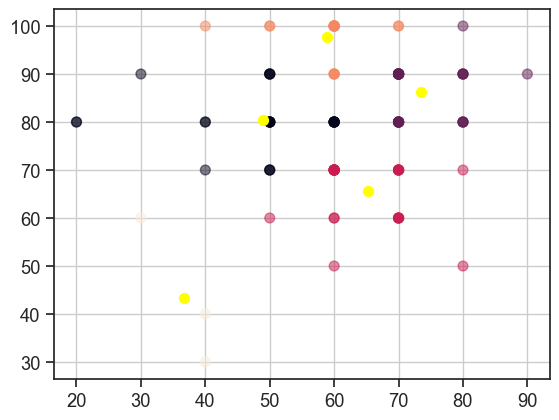

In [21]:
plt.grid(visible=None, which='major', axis='both')
plt.scatter(newData['quantSkills'], newData['verbalSkills'], c= kMeans.labels_.astype(float), s=50, alpha=0.50)
plt.scatter(centroids[:, 0], centroids[:, 1], c="yellow", s=50)